In [12]:
# Here we import everything we need for the project

%matplotlib inline
#from google.colab import files
import os

# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt
import cv2
import pandas as pd

# Get images and video into Jupyter from your webcam
from ipywebrtc import CameraStream, ImageRecorder, VideoRecorder

# Sklearn
from sklearn.model_selection import train_test_split # Helps with organizing data for training
from sklearn.metrics import confusion_matrix, plot_confusion_matrix # Helps present results as a confusion-matrix

print(tf.__version__)

2.2.0


In [13]:
# We need to get all the paths for the images to later load them
imagepaths = []

# Go through all the files and subdirectories inside a folder and save path to images inside list
for root, dirs, files in os.walk(".", topdown=False): 
    for name in files:
        path = os.path.join(root, name)
        if path.endswith("png"): # We want only the images
            imagepaths.append(path)

print(len(imagepaths)) # If > 0, then a PNG image was loaded

16847


In [23]:

# This function is used more for debugging and showing results later. It plots the image into the notebook

def plot_image(path):
    img = cv2.imread(path) # Reads the image into a numpy.array
    img_cvt = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) # Converts into the corret colorspace (RGB)
    print(img_cvt.shape) # Prints the shape of the image just to check
    plt.grid(False) # Without grid so we can see better
    plt.imshow(img_cvt) # Shows the image
    plt.xlabel("Width")
    plt.ylabel("Height")
    plt.title("Image " + path)

(480, 640)


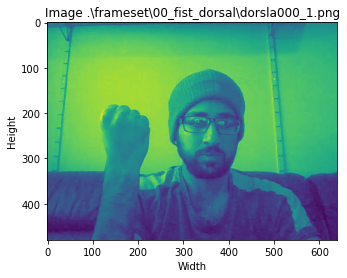

In [24]:
plot_image(imagepaths[1]) #We plot the first image from our imagepaths array



In [21]:
category = path.split("set")[1]
label = int (category.split("_")[0][2]) # We need to convert 10_down to 00_down, or else it crashes
print (category)
print (label)

IndexError: list index out of range

In [25]:
X = [] # Image data
y = [] # Labels

# Loops through imagepaths to load images and labels into arrays
for path in imagepaths:
    img = cv2.imread(path) # Reads image and returns np.array
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) # Converts into the corret colorspace (GRAY)
    img = cv2.resize(img, (320, 120)) # Reduce image size so training can be faster
    X.append(img)
  
  # Processing label in image path
    category = path.split("set")[1]
    label = int (category.split("_")[0][2]) # We need to convert 10_down to 00_down, or else it crashes
    y.append(label)

# Turn X and y into np.array to speed up train_test_split
X = np.array(X, dtype="uint8")
X = X.reshape(len(imagepaths), 120, 320, 1) # Needed to reshape so CNN knows it's different images
y = np.array(y)

print("Images loaded: ", len(X))
print("Labels loaded: ", len(y))

print(y[0], imagepaths[0]) # Debugging

Images loaded:  16847
Labels loaded:  16847
0 .\frameset\00_fist_dorsal\dorsla000_0.png


In [26]:
print(y[8000], imagepaths[8000]) # Debugging

2 .\frameset\02_open_dorsal\open_palm_299.png


In [27]:
ts = 0.3 # Percentage of images that we want to use for testing. The rest is used for training.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=ts, random_state= 42 )

In [28]:

# Import of keras model and hidden layers for our convolutional network
from keras.models import Sequential
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.layers import Dense, Flatten


Using TensorFlow backend.


In [29]:
# Construction of model
model = Sequential()
model.add(Conv2D(32, (5, 5), activation='relu', input_shape=(120, 320, 1))) 
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu')) 
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [30]:
# Configures the model for training 
# Optimization routine, which tells the computer how to adjust the parameter values to minimize the loss function.
# Loss function, which tells us how bad our predictions are.
# List of metrics to be evaluated by the model during training and testing.

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [31]:
# Trains the model for a given number of epochs (iterations on a dataset) and validates it.
model.fit(X_train, y_train, epochs=8, batch_size=16, verbose=1, validation_data=(X_test, y_test))

Train on 11792 samples, validate on 5055 samples
Epoch 1/8
11792/11792 [==============================] - 364s 31ms/step - loss: 0.7444 - accuracy: 0.9216 - val_loss: 0.0722 - val_accuracy: 0.9812
Epoch 2/8
11792/11792 [==============================] - 379s 32ms/step - loss: 0.1367 - accuracy: 0.9705 - val_loss: 0.4934 - val_accuracy: 0.8364
Epoch 3/8
11792/11792 [==============================] - 385s 33ms/step - loss: 0.1103 - accuracy: 0.9679 - val_loss: 0.0183 - val_accuracy: 0.9956
Epoch 4/8
11792/11792 [==============================] - 384s 33ms/step - loss: 0.0330 - accuracy: 0.9930 - val_loss: 0.0139 - val_accuracy: 0.9941
Epoch 5/8
11792/11792 [==============================] - 671s 57ms/step - loss: 0.0121 - accuracy: 0.9969 - val_loss: 0.0019 - val_accuracy: 0.9992
Epoch 6/8
11792/11792 [==============================] - 398s 34ms/step - loss: 2.8523e-04 - accuracy: 1.0000 - val_loss: 9.2781e-04 - val_accuracy: 0.9996
Epoch 7/8
11792/11792 [==============================] 

In [131]:
# Trains the model for a given number of epochs (iterations on a dataset) and validates it.
model.fit(X_train, y_train, epochs=4, batch_size=32, verbose=1, validation_data=(X_test, y_test))

Epoch 1/4
369/369 [==============================] - 434s 1s/step - loss: 0.0211 - accuracy: 0.9951 - val_loss: 0.0126 - val_accuracy: 0.9955
Epoch 2/4
369/369 [==============================] - 455s 1s/step - loss: 0.0389 - accuracy: 0.9906 - val_loss: 0.0308 - val_accuracy: 0.9929
Epoch 3/4
369/369 [==============================] - 497s 1s/step - loss: 0.0218 - accuracy: 0.9958 - val_loss: 0.0045 - val_accuracy: 0.9990
Epoch 4/4
369/369 [==============================] - 509s 1s/step - loss: 9.8232e-05 - accuracy: 1.0000 - val_loss: 5.2024e-05 - val_accuracy: 1.0000


In [32]:
# Save entire model to a HDF5 file
model.save('handrecognition6_model.h5')

In [33]:
test_loss, test_acc = model.evaluate(X_test, y_test)

print('Test accuracy: {:2.2f}%'.format(test_acc*100))

5055/5055 [==============================] - 34s 7ms/step
Test accuracy: 99.96%


In [34]:
predictions = model.predict(X_test) # Make predictions towards the test set

In [35]:
np.argmax(predictions[7]), y_test[7] # If same, got it right

(1, 1)

In [36]:
# Function to plot images and labels for validation purposes
def validate_9_images(predictions_array, true_label_array, img_array):
    # Array for pretty printing and then figure size
    class_names = ["fist_dorsal", "fist_palm", "open_dorsal", "open_palm", "three_fingers_dorsal", "three_fingers_palm"] 
    plt.figure(figsize=(15,5))
  
    for i in range(1, 10):
        # Just assigning variables
        prediction = predictions_array[i]
        true_label = true_label_array[i]
        img = img_array[i]
        img = cv2.cvtColor(img, cv2.COLOR_GRAY2RGB)
    
    # Plot in a good way
        plt.subplot(3,3,i)
        plt.grid(False)
        plt.xticks([])
        plt.yticks([])
        plt.imshow(img, cmap=plt.cm.binary)

        predicted_label = np.argmax(prediction) # Get index of the predicted label from prediction
    
    # Change color of title based on good prediction or not
        if predicted_label == true_label:
            color = 'blue'
        else:
            color = 'red'

        plt.xlabel("Predicted: {} {:2.0f}% (True: {})".format(class_names[predicted_label],
                                  100*np.max(prediction),
                                  class_names[true_label]),
                                  color=color)
    plt.show()

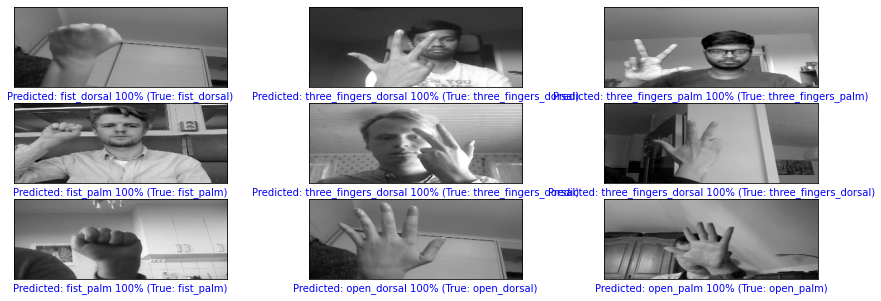

In [37]:
validate_9_images(predictions, y_test, X_test)

In [38]:
y_pred = np.argmax(predictions, axis=1) # Transform predictions into 1-D array with label number

In [39]:
confusion_matrix(y_test, y_pred) 
             #columns=["Predicted open_dorsal", "Predicted open_Palm", "Predicted fist_dorsal", "Predicted Fist_palm", "Predicted three_fingers_dorsal", "Predicted threee_fingers_palm"],
             #index=["Actual open_dorsal", "Actual open_Palm", "Actual fist_dorsal", "Actual Fist_palm", "Actual three_fingers_dorsal", "Actual three_fingers_palm"])

array([[810,   0,   0,   0,   0,   0],
       [  0, 751,   0,   0,   0,   2],
       [  0,   0, 911,   0,   0,   0],
       [  0,   0,   0, 902,   0,   0],
       [  0,   0,   0,   0, 813,   0],
       [  0,   0,   0,   0,   0, 866]], dtype=int64)

In [34]:
plot_confusion_matrix(model,X_test,y_pred)
plt.show()

ValueError: plot_confusion_matrix only supports classifiers

In [95]:
import cv2
import tensorflow as tf
import numpy as np

CATEGORIES = ["fist_dorsal", "fist_palm", "open_dorsal", "open_palm", "three_dorsal", "three_palm"]  # will use this to convert prediction num to string value


def prepare(filepath):
    img = cv2.imread(filepath, cv2.IMREAD_GRAYSCALE) # Reads image and returns np.array
    #img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) # Converts into the corret colorspace (GRAY)
    img = cv2.resize(img, (320, 120)) # Reduce image size so training can be faster
    #img = np.array(img, dtype="uint8")
    return img.reshape(-1, 120, 320, 1)  # return the image with shaping that TF wants.


model = tf.keras.models.load_model("handrecognition6_model.h5")
#prediction = model.predict([prepare('fist_dorsal.jpg')])
#prediction = model.predict([prepare('fist_dorsal0.jpg')])
#prediction = model.predict([prepare('fist_palm.jpg')])
#prediction = model.predict([prepare('fist_palm0.jpg')])
#prediction = model.predict([prepare('open_palm.jpg')])
#prediction = model.predict([prepare('open_palm0.jpg')])
#prediction = model.predict([prepare('open_palm1.jpg')])

#prediction = model.predict([prepare('open_palm11.jpg')])
#prediction = model.predict([prepare('open_dorsal.jpg')])
#prediction = model.predict([prepare('open_dorsal0.jpg')])
#prediction = model.predict([prepare('open_dorsal1.png')])
#prediction = model.predict([prepare('open_dorsal1.jpg')])
#prediction = model.predict([prepare('three_palm.jpg')])
#prediction = model.predict([prepare('three_palm0.jpg')])
#prediction = model.predict([prepare('three_palm11.jpg')])
#prediction = model.predict([prepare('three_dorsal.jpg')])
#prediction = model.predict([prepare('three_dorsal0.jpg')])


pred = np.argmax(prediction, axis=1)
print (CATEGORIES[int(pred)])
print (int (pred))

open_dorsal
2
